In [1]:
import cosmology as cosmo, basic, numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, analysis as ana
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

### Read pre-computed theory spectra

In [2]:
model, alpha = 'TH', 0.
cl = {}
l, cl[100], c1h100 = (np.loadtxt('../data/other/tt_'+model+'_R100.0_a'+str(alpha)+'.dat',usecols=(0,1,2))).T
l, cl[10], c1h10 = (np.loadtxt('../data/other/tt_'+model+'_R10.0_a'+str(alpha)+'.dat',usecols=(0,1,2))).T

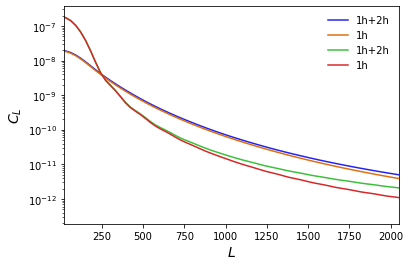

In [3]:
pl.plot_1dstyle(ylog=True)
plot(l,cl[10],label='1h+2h')
plot(l,c1h10,label='1h')
plot(l,cl[100],label='1h+2h')
plot(l,c1h100,label='1h')
legend()

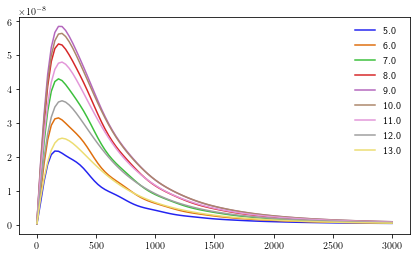

In [14]:
zbin = np.arange(5.,14.,1.)
for zi, zb in enumerate(zbin):
    l, clz = (np.loadtxt('../data/other/tt_'+model+'_R5.0_a'+str(alpha)+'_z'+str(zb)+'.dat',usecols=(0,1))).T
    plot(l,l*clz,label=str(zb))
legend()

### Compare with measurements

In [4]:
p = prjlib.init_analysis(dtype='dr2_smica',fltr='cinv',wtype='Lmask')
__, __, __, qobj, __ = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
al = (np.loadtxt(qobj.f['TT'].al)).T[1]
cy = tools_y.init_compy(p.ids,masktype=0,ytype='nilc',ascale=1.0)
yy = savgol_filter( (np.loadtxt(cy.fclyy)).T[1], 51, 3)
vl = np.sqrt(al*yy)/np.sqrt(qobj.l+1e-30)
fx = tools_y.init_cross(qobj,cy,p.ids,p.stag)
mb = bn.multipole_binning(10,lmin=1,lmax=500)
mcb, vcb, scb, ocb = bn.binned_spec(mb,fx.xl,cn=1,opt=True,vl=vl)

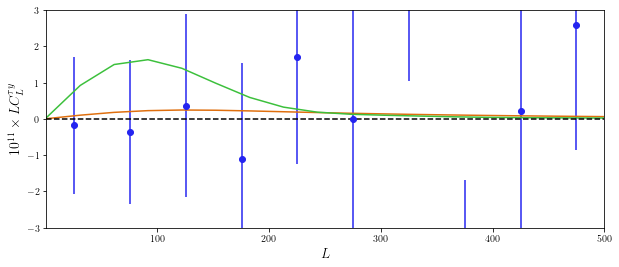

In [5]:
pl.plot_1dstyle(fsize=[10,4],xmin=1,xmax=500,ymin=-3,ymax=3,ylab=r'$10^{11}\times LC_L^{\tau y}$',usetex=True)
s = 1e11
errorbar(mb.bc,s*mb.bc*ocb,yerr=s*mb.bc*vcb,fmt='o')
plot(l,s*l*cl[10]*1.7e-6)
plot(l,s*l*cl[100]*1.7e-6)
axhline(0,color='k',ls='--')

In [6]:
MB = bn.multipole_binning(10,lmin=1,lmax=2048)
ott, mtt, stt, vtt = prjlib.load_binned_tt(MB,qobj,p.rlz)

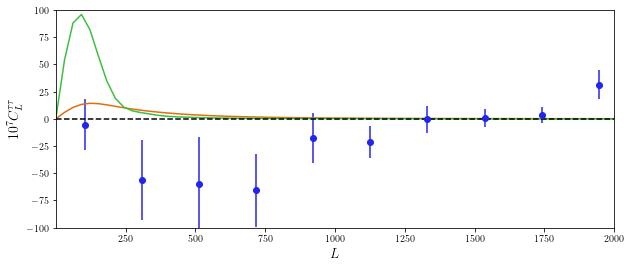

In [7]:
pl.plot_1dstyle(fsize=[10,4],xmin=1,xmax=2000,ymin=-100,ymax=100,ylab=r'$10^7 C_L^{\tau\tau}$',usetex=True)
s = 1e7
errorbar(MB.bc,s*MB.bc*ott,yerr=s*MB.bc*vtt,fmt='o')
plot(l,l*cl[10]*s)
plot(l,l*cl[100]*s)
#plot(L,CL*s)
axhline(0,color='k',ls='--')

### yy SNR

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


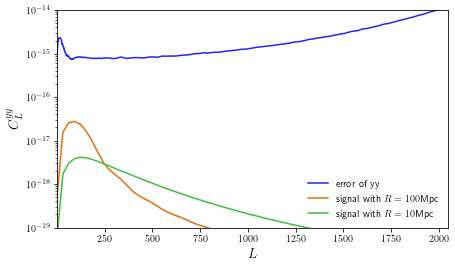

In [8]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=2048,ylog=True,ymin=1e-19,ymax=1e-14,ylab=r'$C_L^{yy}$',usetex=True)
ll = np.linspace(0,2048,2049)
plot(ll,ll*yy/np.sqrt(ll),label='error of yy')
plot(l,l*cl[100]*1.7e-6**2,label=r'signal with $R=100$Mpc')
plot(l,l*cl[10]*1.7e-6**2,label=r'signal with $R=10$Mpc')
legend()